In [707]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [708]:
rodada_jogada = 27  # Ultima rodada jogada: 27
rodada_prox = 28    # Rodada da proxima semana: 28

rodada_futura = pd.read_excel(f'dados/rodadas/rodada-{rodada_prox}.xlsx')
todas_rodadas = pd.read_excel('dados/rodadas/todas_rodadas.xlsx')
tabela = pd.read_excel(f'dados/tabela/tabela-rodada_{rodada_jogada}.xlsx')
historico = pd.read_excel(f'dados/historico/historico-rodada_{rodada_jogada}.xlsx')
historico.drop(['Time', 'Comp', 'Day', 'Result'], axis= 1, inplace= True)


In [709]:
historico['Venue'] = historico['Venue'].map({'Home': 1, 'Away': 0})

In [710]:
historico.head()

,Date,Round,Venue,GF,GA,Opponent,xG,xGA,Poss,Attendance,...,Blocks,SCA,GCA,TklW,Def 3rd,Mid 3rd,Att 3rd,Int,Err,Equipe
0,2023-04-15,1,1,2,1,Sao Paulo,0.9,2.0,33,11708.0,...,9,19,3,6,4,4,1,17,0,Botafogo (RJ)
1,2023-04-24,2,0,2,1,Bahia,0.2,0.9,42,27822.0,...,5,10,4,11,8,16,0,15,0,Botafogo (RJ)
2,2023-04-30,3,0,3,2,Flamengo,1.9,3.1,26,53138.0,...,6,21,6,12,11,6,1,11,0,Botafogo (RJ)
3,2023-05-07,4,1,2,0,Atletico Mineiro,2.0,0.5,39,18218.0,...,6,38,3,14,10,12,0,13,1,Botafogo (RJ)
4,2023-05-11,5,1,3,0,Corinthians,2.6,0.6,53,22388.0,...,8,27,5,5,4,5,1,11,0,Botafogo (RJ)


In [711]:
historico.columns

Index(['Date', 'Round', 'Venue', 'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss',
       'Attendance', 'Sh', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'FK', 'PK', 'PKatt',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'SoTA', 'Saves', 'Save%', 'CS',
       'PSxG', 'PSxG+/-', 'TotDist', 'PrgDist', 'Ast', 'xAG', 'xA', 'KP',
       '1/3', 'PPA', 'CrsPA', 'PrgP', 'TB', 'Sw', 'Crs', 'Blocks', 'SCA',
       'GCA', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Int', 'Err', 'Equipe'],
      dtype='object')

In [712]:
historico.drop(376, inplace= True)
historico.drop(191, inplace= True)

In [713]:
modelo = smf.glm(formula= 'GF ~ C(Equipe)*C(Venue)*xG + C(Opponent)', data= historico, family= sm.families.Poisson()).fit()

In [714]:
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     GF   No. Observations:                  538
Model:                            GLM   Df Residuals:                      439
Model Family:                 Poisson   Df Model:                           98
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -637.42
Date:                Tue, 24 Oct 2023   Deviance:                       375.90
Time:                        11:12:12   Pearson chi2:                     320.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3792
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

# Analise de Residuo

In [715]:
residuos = modelo.resid_response
residuos_media = residuos.mean()
residuos_padrao = modelo.resid_pearson
fitted = modelo.fittedvalues
observados = historico['GF']

<Axes: xlabel='GF'>

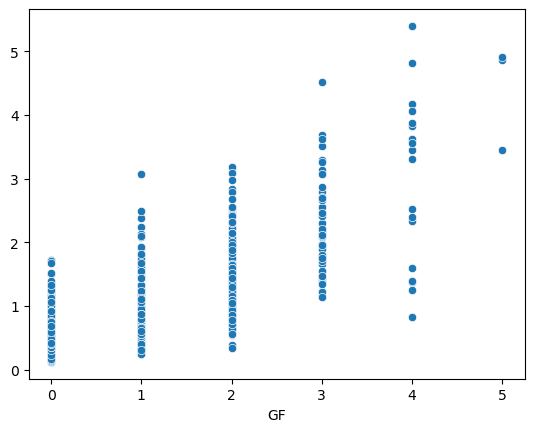

In [716]:
sns.scatterplot(x= observados, y= fitted)

<Axes: >

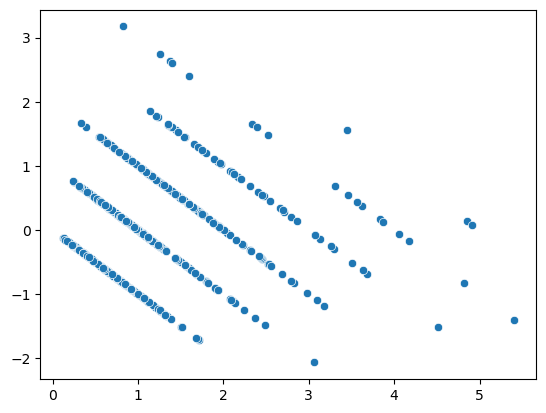

In [717]:
sns.scatterplot(x= fitted, y = residuos)

<Axes: >

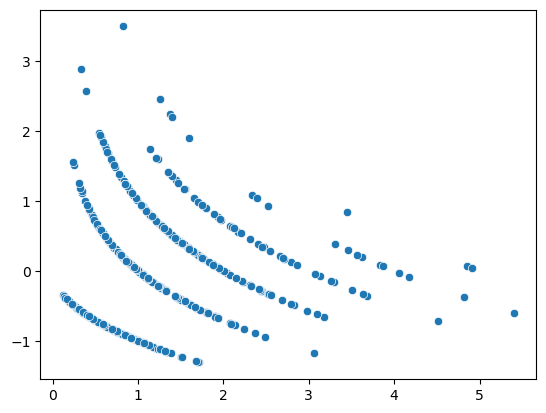

In [718]:
sns.scatterplot(x= fitted, y= residuos_padrao)

In [719]:
infl = modelo.get_influence()
infl.summary_frame().sort_values("cooks_d", ascending= False)

,dfb_Intercept,dfb_C(Equipe)[T.Ath Paranaense],dfb_C(Equipe)[T.Atletico Mineiro],dfb_C(Equipe)[T.Bahia],dfb_C(Equipe)[T.Botafogo (RJ)],dfb_C(Equipe)[T.Bragantino],dfb_C(Equipe)[T.Corinthians],dfb_C(Equipe)[T.Coritiba],dfb_C(Equipe)[T.Cruzeiro],dfb_C(Equipe)[T.Cuiaba],...,dfb_C(Equipe)[T.Gremio]:C(Venue)[T.1]:xG,dfb_C(Equipe)[T.Internacional]:C(Venue)[T.1]:xG,dfb_C(Equipe)[T.Palmeiras]:C(Venue)[T.1]:xG,dfb_C(Equipe)[T.Santos]:C(Venue)[T.1]:xG,dfb_C(Equipe)[T.Sao Paulo]:C(Venue)[T.1]:xG,dfb_C(Equipe)[T.Vasco da Gama]:C(Venue)[T.1]:xG,cooks_d,standard_resid,hat_diag,dffits_internal
373,-0.003819,0.004743,0.008218,-1.000873,0.002888,-0.002515,0.000004,0.003049,0.004689,-0.001666,...,-0.003468,-0.006094,-0.002506,-0.004250,-6.352410e-03,-0.004451,3.868758e-01,0.727209,0.986381,6.188756
455,0.004504,0.000685,-0.007767,0.002835,-0.005820,0.002239,-0.005521,0.005623,-0.003637,0.007449,...,-0.007074,0.006211,-0.002442,1.891456,4.571815e-03,-0.001096,2.693731e-01,-1.362280,0.934938,-5.164100
341,-0.017456,0.003661,0.014616,-0.005872,0.008148,0.020628,0.018311,0.034255,-0.000904,0.039105,...,0.030173,0.005936,-0.017009,0.004132,2.942159e-03,0.025737,9.926784e-02,-1.580092,0.797416,-3.134887
111,0.008648,-0.011932,-0.030603,0.004582,0.003561,0.010011,-0.011209,0.000608,0.006260,0.004939,...,-0.026298,-0.011556,-0.599596,-0.038989,-1.488065e-02,-0.012462,2.160158e-02,1.275774,0.567835,1.462380
350,-0.027772,0.000755,0.006716,0.006630,0.019126,-0.007064,-0.487557,0.009299,0.003733,0.012007,...,0.004974,-0.002825,-0.000647,-0.003243,4.140362e-03,-0.002685,1.959809e-02,0.950609,0.682244,1.392915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,0.000853,-0.000167,-0.000063,-0.000011,-0.000139,-0.000037,-0.000042,-0.000011,0.000241,-0.000293,...,-0.000086,-0.000030,-0.000113,0.000003,5.448440e-05,-0.000104,5.095677e-07,0.016571,0.155201,0.007103
202,-0.000004,-0.000009,0.000084,0.000064,0.000071,0.000093,0.000064,0.000169,0.000059,-0.000071,...,-0.000065,-0.000051,-0.000175,-0.000127,-9.274212e-05,-0.000081,2.082269e-07,-0.011752,0.129873,-0.004540
126,0.000075,-0.000053,-0.000029,-0.000069,-0.000015,-0.000014,-0.000025,-0.000107,-0.000070,-0.000109,...,-0.000023,0.000008,0.000293,-0.000060,-6.111690e-05,-0.000015,5.992564e-08,-0.006530,0.122127,-0.002436
429,0.000012,-0.000044,-0.000041,-0.000044,-0.000044,0.000073,-0.000015,-0.000010,-0.000060,-0.000003,...,-0.000035,-0.000013,-0.000037,-0.000024,-6.800935e-05,0.000779,5.953631e-08,0.006107,0.136458,0.002428


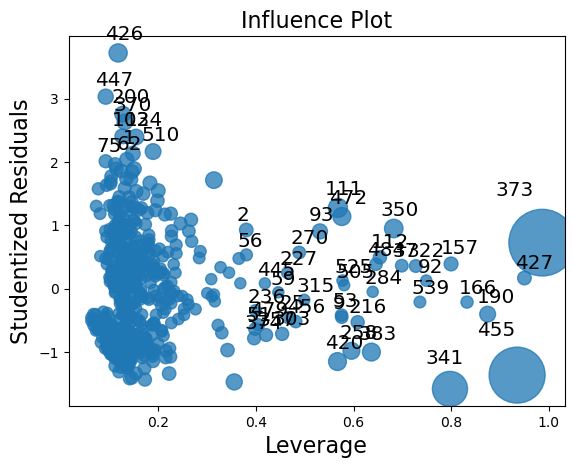

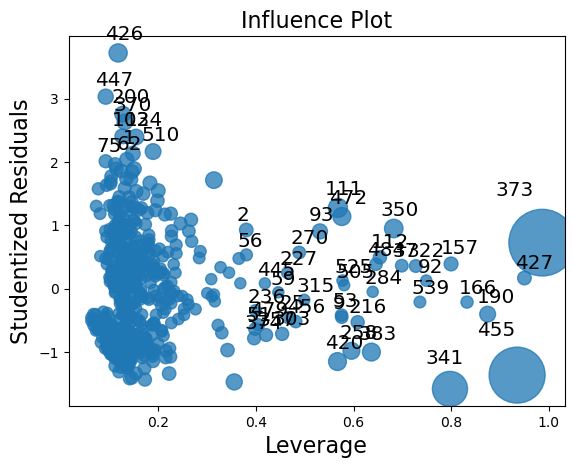

In [720]:
infl.plot_influence()

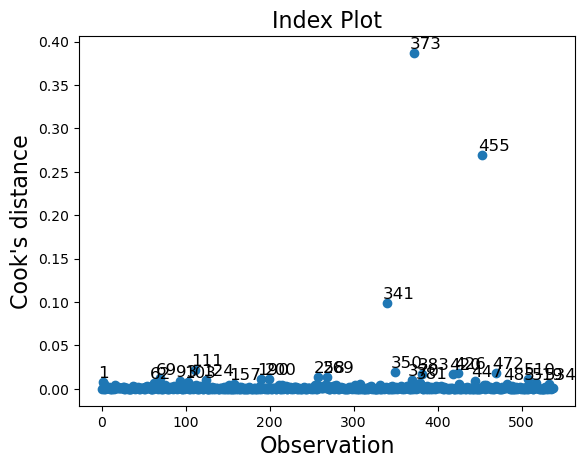

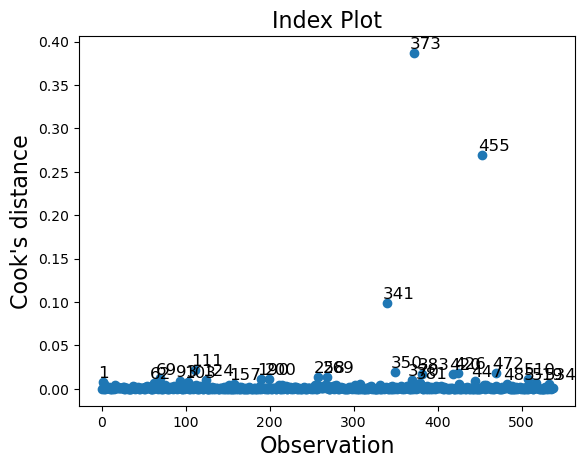

In [721]:
infl.plot_index(y_var="cooks", threshold=2 * infl.cooks_distance[0].mean())

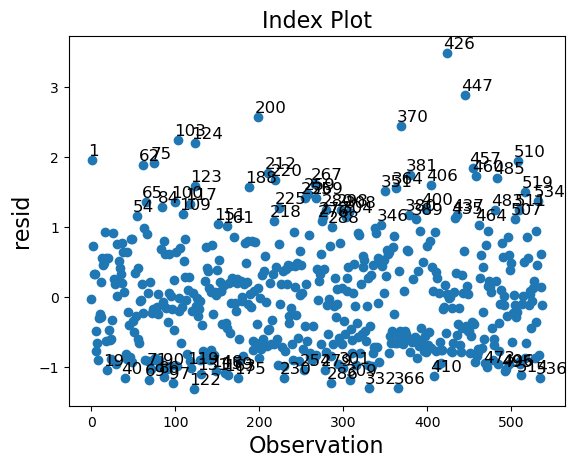

In [722]:
fig = infl.plot_index(y_var="resid", threshold=1)

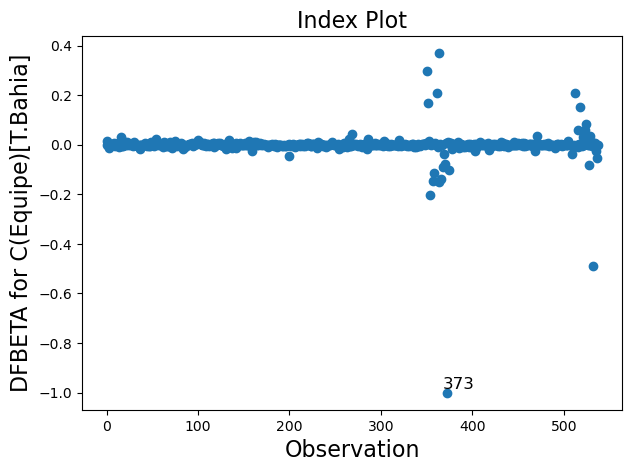

In [723]:
fig = infl.plot_index(y_var="dfbeta", idx=3, threshold=0.5)
fig.tight_layout(pad=1.0)


# Seleção de Variaveis

# Previsao

'GF ~ C(Equipe)*C(Venue)*xG + C(Opponent)'

In [724]:
def matrix_probs(df, tabela= tabela):
  lambdas = {}
  matriz_gols = {}
  #rho_matriz = {}

  for i in range(0, 10):
    tabela_casa = tabela[tabela['Squad'] == df.iloc[i,3]]
    tabela_fora = tabela[tabela['Squad'] == df.iloc[i,8]]
    lambda_x = modelo.predict(pd.DataFrame(data={'Equipe': df.iloc[i, 3], 
                                                 'Opponent': df.iloc[i, 8],
                                                 'Venue': 1,
                                                 'xG': float(tabela_casa['xG_casa'])}, #Poder de ataque
                                           index=[1])).values[0]
    lambda_y = modelo.predict(pd.DataFrame(data={'Equipe': df.iloc[i, 8], 
                                                 'Opponent': df.iloc[i, 3],
                                                 'Venue': 0,
                                                 'xG': float(tabela_fora['xG_fora'])}, #Poder de ataque
                                           index=[1])).values[0]
    lambdas[df.iloc[i, 3]] = [[stats.poisson.pmf(i, lambdas) for i in range(0, 8)] for lambdas in [lambda_x, lambda_y]]
    matriz_gols[df.iloc[i, 3]] = np.outer(lambdas[df.iloc[i, 3]][0], lambdas[df.iloc[i, 3]][1])
    #rho_matriz[time] = np.array([[rho_dependencia(gol_casa, gol_fora, lambda_x, lambda_y, value[5]) for gol_fora in range(2)] for gol_casa in range(2)])
    #matriz_gols[time][:2,:2] = matriz_gols[time][:2,:2] * rho_matriz[time]

  return matriz_gols#, lambdas, rho_matriz


def inserir_df(matriz, df):
  times = list(matriz.keys())
  
  for time in times:
    df.loc[df['Home'] == time, 'vitoria_casa'] = np.sum(np.tril(matriz[time], -1))
    df.loc[df['Home'] == time, 'empate'] = np.sum(np.diag(matriz[time]))
    df.loc[df['Home'] == time, 'vitoria_fora'] = np.sum(np.triu(matriz[time], 1))
  
  return df

In [725]:
matriz_gols = matrix_probs(rodada_futura)
rodada_previsoes = inserir_df(matriz_gols, rodada_futura)

# Adicionar em 'Todas Previsoes'

In [726]:
todas_previsoes = pd.read_excel('dados/previsoes/todas_previsoes.xlsx', index_col= None)
todas_previsoes.drop(todas_previsoes.columns[0], axis=1, inplace= True)

In [727]:
if (todas_previsoes[todas_previsoes['Wk'] == rodada_prox]['vitoria_casa'] == None).all():
  todas_previsoes = pd.concat([todas_previsoes, rodada_futura], ignore_index= True)
if (todas_previsoes[todas_previsoes['Wk'] == rodada_prox]['gols_casa'].isna()).all():
  resultados = todas_rodadas[todas_rodadas['Wk'] >= todas_previsoes['Wk'].min()].reset_index().drop('index', axis= 1)
  todas_previsoes.update(resultados)

In [728]:
def compare_columns(row):
    if row['gols_casa'] > row['gols_fora']:
        return 'gols_casa'
    elif row['gols_casa'] < row['gols_fora']:
        return 'gols_fora'
    else:
        return 'empate'  # Handle cases when values are equal

def compare_columns1(row):
    if row['vitoria_casa'] > row['empate'] and row['vitoria_casa'] > row['vitoria_fora']:
        return 'gols_casa'
    elif row['vitoria_fora'] > row['empate'] and row['vitoria_fora'] > row['vitoria_casa']:
        return 'gols_fora'
    else:
        return 'empate'  # Handle cases when values are equal

def compare_columns2(row):
    if row['acerto1'] == row['acerto2']:
        return 'acerto'
    else:
        return 'fracasso'

# Apply the custom function to create the 'Larger_Column' column
todas_previsoes['acerto1'] = todas_previsoes.apply(compare_columns, axis=1)
todas_previsoes['acerto2'] = todas_previsoes.apply(compare_columns1, axis=1)
todas_previsoes['acerto'] = todas_previsoes.apply(compare_columns2, axis=1)

todas_previsoes.drop(['acerto1', 'acerto2'], axis=1, inplace= True)

In [729]:
todas_previsoes.to_excel('dados/previsoes/todas_previsoes.xlsx')
rodada_futura.to_excel(f'dados/previsoes/previsao_rodada-{rodada_prox}.xlsx')